In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Assets/Earthquake database 01011677 to 11042025.csv', index_col='DATE', parse_dates=True)

### Afterschock analysis
Analysing the aftershock behavior from two perspectives:
1. Number of aftershocks per day
2. Magnitude of the strongest aftershock per day

Note: The data from before the 1986 earthquakes is not so reliable due to less instruments for observation. However, the data from 1977 complements and reinforces any conclusion drawn based on the 1986 data.<br>
Conclusions will be found below the figure.

In [4]:
def get_aftershock_data(start_date, days=15):
    data = df.loc[start_date:]
    daily_aftershocks = data['Mw'].resample('D')
    aftershocks = daily_aftershocks.agg(max_Mw='max', count='count').round(2).reset_index()
    return aftershocks.iloc[:days]   # restricting the list to 14 days from the big event and by doing this also including NaN values

aftershocks_1977 = get_aftershock_data('1977-03-04')
aftershocks_1986 = get_aftershock_data('1986-08-30')

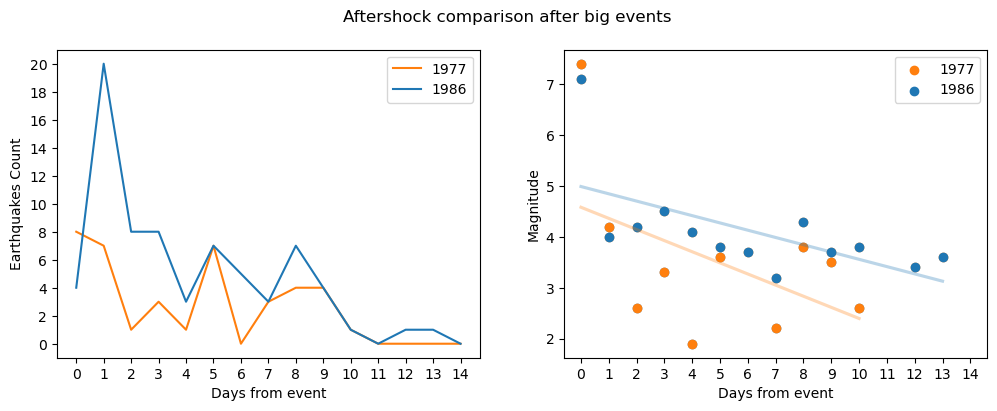

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

x_1977 = aftershocks_1977.index
x_1986 = aftershocks_1986.index
count_1977 = aftershocks_1977['count']
count_1986 = aftershocks_1986['count']
max_1977 = aftershocks_1977['max_Mw']
max_1986 = aftershocks_1986['max_Mw']

fig.suptitle('Aftershock comparison after big events')

color_1977 = 'tab:orange'
color_1986 = 'tab:blue'

# Creating the graph on the left hand side, showing the count of earthquakes from the big event
axes[0].plot(x_1977, count_1977, c=color_1977, label='1977')
axes[0].plot(x_1986, count_1986, c=color_1986, label='1986')
axes[0].set_ylabel('Earthquakes Count')
axes[0].set_xlabel('Days from event')

axes[0].xaxis.set_major_locator(MultipleLocator(base=1))
axes[0].yaxis.set_major_locator(MultipleLocator(base=2))

axes[0].legend()

# Creating the plot on the right hand side, scattering the biggest earthquake each day after the big event
sns.regplot(x=x_1977, y=max_1977, ci=False, line_kws={'color': color_1977, 'alpha': 0.3}, ax=axes[1])
axes[1].scatter(x_1977, max_1977, c=color_1977, label='1977')
sns.regplot(x=x_1986, y=max_1986, ci=False, line_kws={'color': color_1986, 'alpha': 0.3}, ax=axes[1])
axes[1].scatter(x_1986, max_1986, c=color_1986, label='1986')

axes[1].set_ylabel('Magnitude')
axes[1].set_xlabel('Days from event')

axes[1].set_xlim(-0.6, 14.6)
axes[1].xaxis.set_major_locator(MultipleLocator(base=1))
axes[1].yaxis.set_major_locator(MultipleLocator(base=1))

axes[1].legend()


plt.show()

#### **Conclusions** drawn from this analysis:
1. Aftershock activity generally lasts around 10 days, with the first day showing the highest number of events - up to 20 registered earthquakes in 1986.
2. Aftershocks do not exceed 5 Mw, and their intensity clearly decreases over time.